<a href="https://colab.research.google.com/github/shidan619/FYP/blob/main/Module_2_2_Aspect_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/zidan/preprocessed_data.csv')

In [ ]:
df.head(10)

,product_name,review,review_without_emoji,preprocess_text,preprocess_text1
0,"Salate Cordless Electric Spin Scrubber, Electr...",I absolutely love this wireless electric spin ...,I absolutely love this wireless electric spin ...,i absolutely love this wireless electric spin ...,"['absolutely', 'love', 'wireless', 'electric',..."
1,"Salate Cordless Electric Spin Scrubber, Electr...",i used this to clean my bathroom and this work...,i used this to clean my bathroom and this work...,i used this to clean my bathroom and this work...,"['used', 'clean', 'bathroom', 'works', 'wonder..."
2,"Salate Cordless Electric Spin Scrubber, Electr...",This electric brush makes cleaning so much eas...,This electric brush makes cleaning so much eas...,this electric brush makes cleaning so much eas...,"['electric', 'brush', 'makes', 'cleaning', 'mu..."
3,"Salate Cordless Electric Spin Scrubber, Electr...",This Electric spin scrubber is perfect! Use it...,This Electric spin scrubber is perfect! Use it...,this electric spin scrubber is perfect use it ...,"['electric', 'spin', 'scrubber', 'perfect', 'u..."
4,"Salate Cordless Electric Spin Scrubber, Electr...",I don’t like cleaning but this machine help me...,I don’t like cleaning but this machine help me...,i dont like cleaning but this machine help me ...,"['dont', 'like', 'cleaning', 'machine', 'help'..."
5,"Salate Cordless Electric Spin Scrubber, Electr...",It has really made my life so much easy! Its v...,It has really made my life so much easy! Its v...,it has really made my life so much easy its ve...,"['really', 'made', 'life', 'much', 'easy', 'ea..."
6,"Salate Cordless Electric Spin Scrubber, Electr...",So far I've used this powered scrubber a coupl...,So far I've used this powered scrubber a coupl...,so far ive used this powered scrubber a couple...,"['far', 'ive', 'used', 'powered', 'scrubber', ..."
7,"Salate Cordless Electric Spin Scrubber, Electr...",I did not like to clean the kitchen. This mach...,I did not like to clean the kitchen. This mach...,i did not like to clean the kitchen this machi...,"['like', 'clean', 'kitchen', 'machine', 'helpe..."
8,"Charmin Ultra Strong Clean Touch Toilet Paper,...","Ladies and gentlemen, get ready for a review t...","Ladies and gentlemen, get ready for a review t...",ladies and gentlemen get ready for a review th...,"['ladies', 'gentlemen', 'get', 'ready', 'revie..."
9,"Charmin Ultra Strong Clean Touch Toilet Paper,...","Oh, Ultra Strong Toilet Paper, how you do\nPro...","Oh, Ultra Strong Toilet Paper, how you do\nPro...",oh ultra strong toilet paper how you do\nprote...,"['oh', 'ultra', 'strong', 'toilet', 'paper', '..."


In [ ]:
import pandas as pd
import re

# Define rules for aspect extraction
rules = {
    'price': [r'expensive|price|amount|sale|discount|offers|cost|affordable|reasonable|cheap|value|buy|money|cost-effective|overpriced|budget-friendly|economical|discounted|worth the price|range|bargain|competitive|wallet-friendly|inexpensive|pricing|deal|buying|purchase|offer'],
    'quality': [r'quality|old|stock|fragrance|grade|reliable|grade|durability|sturdy|made|lasting|premium|strong|love|work|help|long|use|excellent|top-notch|superior|inconsistent|unreliable|high-end|performance|flawless|satisfaction|super|solid|dependable|satisfactory|exceptional|performance|trust|impressive|impeccable|delicate|prefers|smell|hole|tasty|broken|yummy|fresh'],
    'delivery': [r'shipping|cost|delivery|delivered|faster|quickly|charges|shipment|ontime|free shipping|transportation|courier|expenses|express delivery|handling fees|international|overnight|rates|discounts|policies|threshold|shipping|tracking|time|fast|reliable|ordered|sealed'],
    'packaging': [r'packaging|package|packing|leaked|packed|wrapped|box|bottle|cover|presentation|casing|container|aesthetic|secure|eco-friendly|damage-proof|protective|appealing|attractive|recyclable|innovative|well-designed|damaged|leak|crushed|sealed|hole|broken'],
    'design': [r'design|aesthetic|visual|appearance|look|stylish|modern|elegant|sleek|beautiful|ergonomic|innovative|eye-catching|soft|thick|easy|easier'],
    'customer service': [r'customer|service|missing|seller|support|assistance|helpdesk|responsive|helpful|friendly|courteous|refund|person|fraud|knowledgeable|prompt|satisfactory|excellent|professional|quick|response|happy'],
    'usability': [r'usability|user-friendly|intuitive|use|functional|efficiency|navigation|convenient|accessible|user|experience|seamless|effortless|delicate|use|happy|job|durable|fits|recommended']
}

# Function to apply rules and extract aspects from text
def extract_aspects(text):
    aspects = []
    for aspect, patterns in rules.items():
        for pattern in patterns:
            if re.search(pattern, text, flags=re.IGNORECASE):
                aspects.append(aspect)
                break
    return aspects

# Apply aspect extraction to the dataset
df['aspects'] = df['review'].str.lower().apply(extract_aspects)

# Convert aspects to binary columns
aspects = ['price', 'quality', 'delivery', 'packaging', 'design', 'customer service', 'usability']
for aspect in aspects:
    df[aspect] = df['aspects'].apply(lambda x: 1 if aspect in x else 0)


In [ ]:
df

,product_name,review,review_without_emoji,preprocess_text,preprocess_text1,aspects,price,quality,delivery,packaging,design,customer service,usability
0,"Salate Cordless Electric Spin Scrubber, Electr...",I absolutely love this wireless electric spin ...,I absolutely love this wireless electric spin ...,i absolutely love this wireless electric spin ...,"['absolutely', 'love', 'wireless', 'electric',...","[quality, delivery, design, usability]",0,1,1,0,1,0,1
1,"Salate Cordless Electric Spin Scrubber, Electr...",i used this to clean my bathroom and this work...,i used this to clean my bathroom and this work...,i used this to clean my bathroom and this work...,"['used', 'clean', 'bathroom', 'works', 'wonder...","[quality, design, usability]",0,1,0,0,1,0,1
2,"Salate Cordless Electric Spin Scrubber, Electr...",This electric brush makes cleaning so much eas...,This electric brush makes cleaning so much eas...,this electric brush makes cleaning so much eas...,"['electric', 'brush', 'makes', 'cleaning', 'mu...","[delivery, design, usability]",0,0,1,0,1,0,1
3,"Salate Cordless Electric Spin Scrubber, Electr...",This Electric spin scrubber is perfect! Use it...,This Electric spin scrubber is perfect! Use it...,this electric spin scrubber is perfect use it ...,"['electric', 'spin', 'scrubber', 'perfect', 'u...","[quality, usability]",0,1,0,0,0,0,1
4,"Salate Cordless Electric Spin Scrubber, Electr...",I don’t like cleaning but this machine help me...,I don’t like cleaning but this machine help me...,i dont like cleaning but this machine help me ...,"['dont', 'like', 'cleaning', 'machine', 'help'...","[quality, design, usability]",0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11052,2 Pack Pumice Stone for Toilet Cleaning with E...,Work great,Work great,work great,"['work', 'great']",[quality],0,1,0,0,0,0,0
11053,2 Pack Pumice Stone for Toilet Cleaning with E...,The tool works fairly well for removing hard s...,The tool works fairly well for removing hard s...,the tool works fairly well for removing hard s...,"['tool', 'works', 'fairly', 'well', 'removing'...","[quality, usability]",0,1,0,0,0,0,1
11054,2 Pack Pumice Stone for Toilet Cleaning with E...,Long handle so you don’t have to put your hand...,Long handle so you don’t have to put your hand...,long handle so you dont have to put your hand ...,"['long', 'handle', 'dont', 'put', 'hand', 'far...",[quality],0,1,0,0,0,0,0
11055,2 Pack Pumice Stone for Toilet Cleaning with E...,It works very nicely on these Arizona hard wat...,It works very nicely on these Arizona hard wat...,it works very nicely on these arizona hard wat...,"['works', 'nicely', 'arizona', 'hard', 'water'...",[quality],0,1,0,0,0,0,0


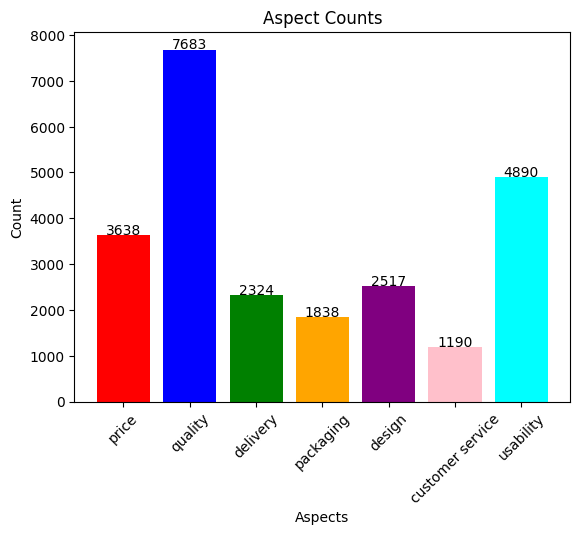

In [ ]:
import matplotlib.pyplot as plt

# Count the enabled aspects
aspect_counts = df[aspects].sum()

# Create a bar plot with different colors for each aspect
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'cyan']
plt.bar(aspect_counts.index, aspect_counts.values, color=colors)

# Display the total counts for each aspect above the bars
for i, count in enumerate(aspect_counts.values):
    plt.text(i, count + 10, str(count), ha='center')

plt.xlabel('Aspects')
plt.ylabel('Count')
plt.title('Aspect Counts')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Specify the path and filename for saving the CSV file
save_path = '/content/drive/MyDrive/zidan/aspect_extracted_file.csv'

# Save the preprocessed data to CSV
df.to_csv(save_path, index=False)